In [41]:
import os
import json
import numpy as np
import matplotlib.pyplot as plt

samples like: 8 + 6 * 3 / 2 - 4 * 7 * 4 / 5 - 1 / 5 / 4 * 9 / 9 + 1 + 8 * 4 - 7 * 9 * 9 + 3 / 4 + 7 / 9 - 6 / 6 * 4 + 3 / 3 1 5 1 2 3 4 6 7 1 2 3 4 5 6 8 9 1 2 3 4 5 6 7 8 10 11 12 13 1 2 14 15 1 2 3 4 16 17 1 2 18 19 1 2 20 21 1 2 3 4 22 23 1 2 23 2

In [42]:
seq = '8 + 6 * 3 / 2 - 4 * 7 * 4 / 5 - 1 / 5 / 4 * 9 / 9 + 1 + 8 * 4 - 7 * 9 * 9 + 3 / 4 + 7 / 9 - 6 / 6 * 4 + 3 / 3'.split(' ')
seq_len = len(seq)
ds = '1 5 1 2 3 4 6 7 1 2 3 4 5 6 8 9 1 2 3 4 5 6 7 8 10 11 12 13 1 2 14 15 1 2 3 4 16 17 1 2 18 19 1 2 20 21 1 2 3 4 22 23 1 2'.split(' ')
syn_dis = [int(d) for d in ds]

In [43]:
a = {i:[] for i in range(seq_len)}
window_size = 10
i = 0
nc = 0
nt = 0
with open('feval-analy_d23_ne10-alstm.txt', 'r') as f:
    for line in f:
        line_json = json.loads(line)
        if 'a' not in line_json:
            nc += line_json['is_correct']
            nt += 1
            i = 0
            continue
        
        vec = [0] * seq_len
        atten = line_json['a']
        vec[i-len(atten):i] = atten
#         if len(atten) > 0:
#         vec[i+1-len(atten):i+1] = atten
        a[i].append(vec)
        i += 1


In [44]:
nc/nt

0.718

In [45]:
a_temp = {i:[] for i in range(seq_len)}
for i in range(seq_len):
    a_temp[i] = np.array(a[i]).sum(0)/len(a[i])

In [46]:
len(a[10][1])

55

In [47]:
attens = np.array([a_temp[i] for i in range(seq_len)]).transpose()

In [48]:
attens

array([[0.        , 1.        , 0.11279522, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.88720478, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.55056468,
        0.30193129],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.26272676],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

Text(0.5,0,'input')

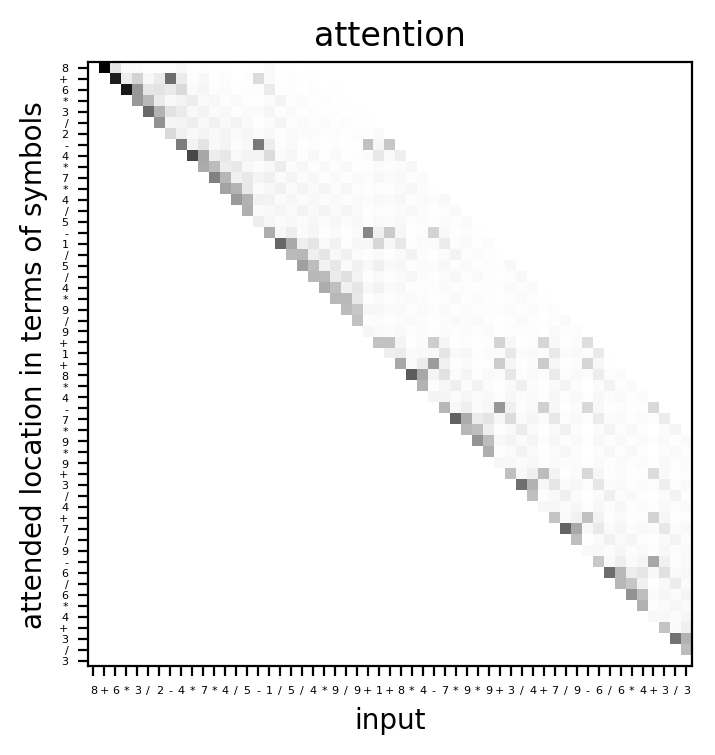

In [49]:
fig, ax = plt.subplots()
fig.dpi = 200
plt.title('attention')
plt.imshow(attens, cmap=plt.cm.gray_r)
plt.xticks(np.arange(seq_len), list(seq), fontsize=4)
plt.ylabel('attended location in terms of symbols')
plt.yticks(np.arange(seq_len), list(seq), fontsize=4)
# plt.yticks(np.arange(0, seq_len, 3))
plt.xlabel('input')

Text(0.5,0,'input symbol')

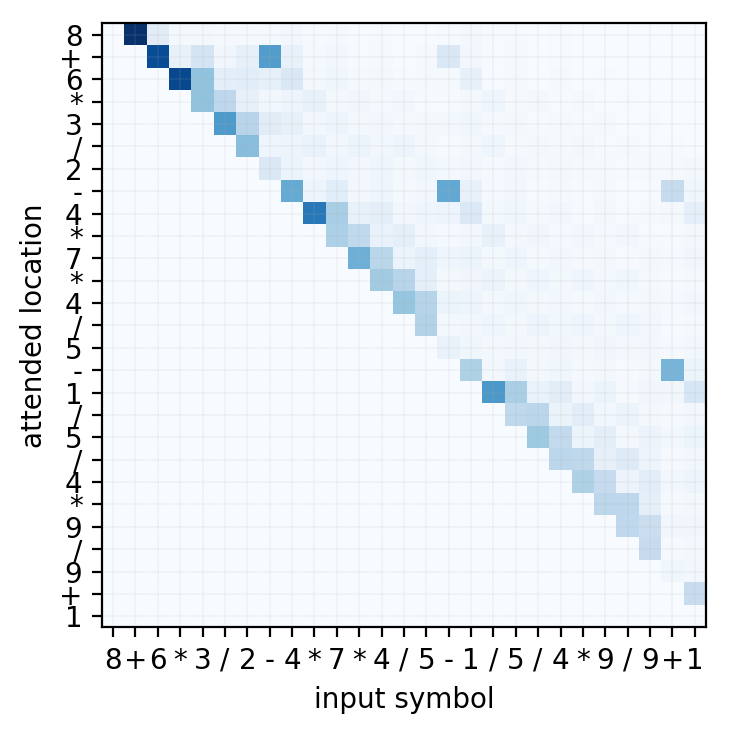

In [50]:
fig, ax = plt.subplots()
fig.dpi = 200
kept = 27
# plt.title('attention')
plt.imshow(attens[:kept, :kept], cmap=plt.cm.Blues)
#            , interpolation='gaussian')
plt.xticks(np.arange(seq_len)[:kept], list(seq)[:kept], fontsize=10)
plt.ylabel('attended location')
plt.yticks(np.arange(seq_len)[:kept], list(seq)[:kept], fontsize=10)
plt.grid(linestyle='dashed', linewidth=0.1)
# plt.yticks(np.arange(0, seq_len, 3))
plt.xlabel('input symbol')

# whether the policy is stable

In [51]:
a = {i:[] for i in range(seq_len)}
window_size = 5
i = 0
nc = 0
nt = 0
with open('feval-analy_d23_ne10-alstm.txt', 'r') as f:
    for line in f:
        line_json = json.loads(line)
        if 'a' not in line_json:
            nc += line_json['is_correct']
            nt += 1
            continue
        
        vec = [0] * seq_len
        atten = line_json['a']
        vec[i+1-len(atten):i+1] = atten
        a[i].append(vec)
        i += 1
        i %= seq_len

In [52]:
def draw_sample(idx):
    a_temp = {i:[] for i in range(seq_len)}
    for i in range(seq_len):
        a_temp[i] = np.array(a[i][idx:idx+1]).sum(0)/len(a[i][idx:idx+1])
    attens = np.array([a_temp[i] for i in range(seq_len)])
    fig, ax = plt.subplots()
    fig.dpi = 200
    plt.title('attention')
    plt.imshow(attens)
    plt.xticks(np.arange(seq_len), list(seq))
    plt.ylabel('time step')
    plt.yticks(np.arange(0, seq_len, 3))
    plt.xlabel('input')

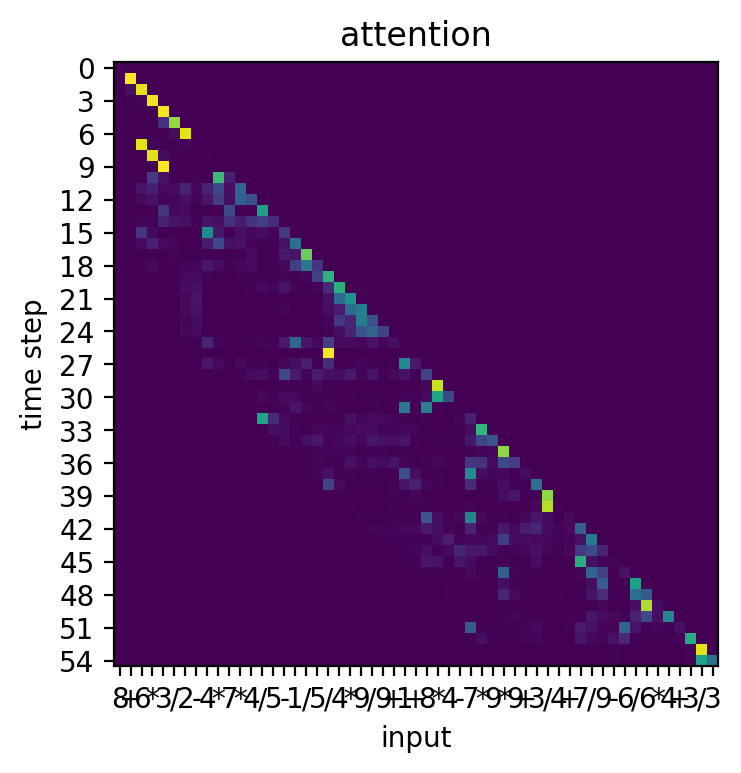

In [53]:
draw_sample(0)

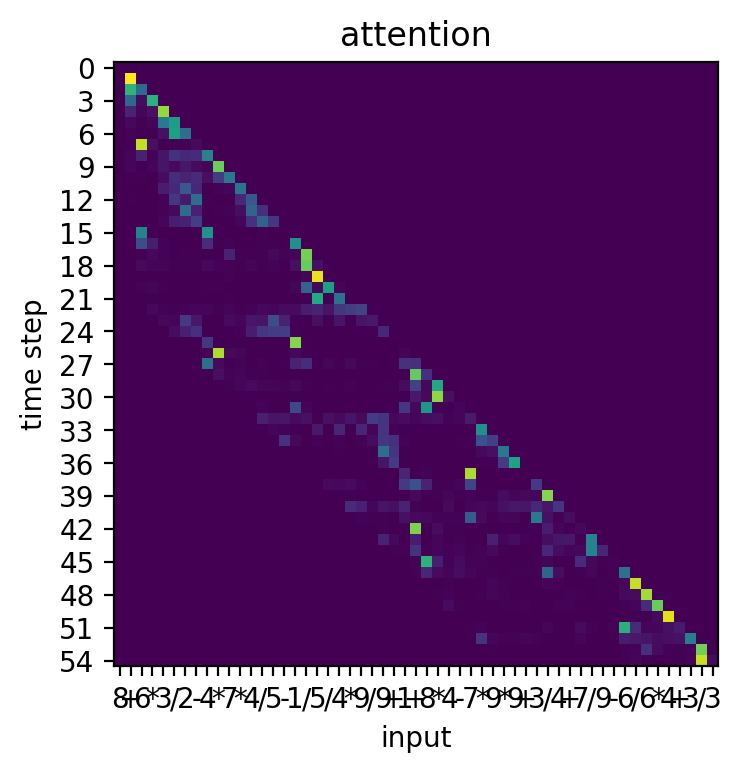

In [54]:
draw_sample(1)

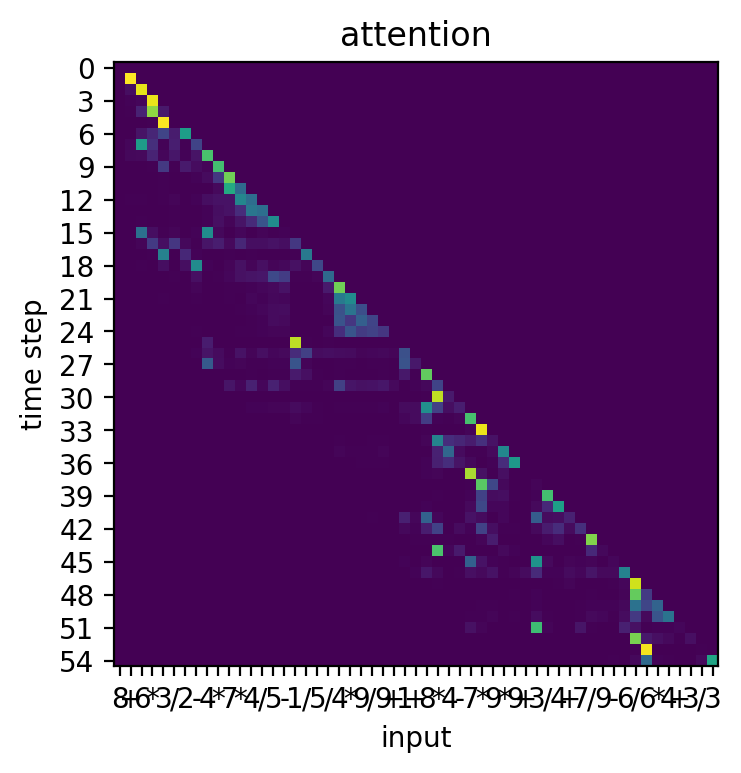

In [55]:
draw_sample(20)

# l/r : fraction of gates that are left/right saturated

In [56]:
in_l = {i:0 for i in range(seq_len)} 
in_r = {i:0 for i in range(seq_len)}
forget_l = {i:0 for i in range(seq_len)}
forget_r = {i:0 for i in range(seq_len)}
out_l = {i:0 for i in range(seq_len)}
out_r = {i:0 for i in range(seq_len)}
ngates = 0

In [57]:
i = 0
with open('feval-analy_d23_ne10-alstm_lstm.txt', 'r') as f:
    for line in f:
        line_json = json.loads(line)
        t = line_json['t']
        ngates += 100
        for in_gate in line_json['i']:
            if in_gate > 0.9:
                in_r[t] += 1
            elif in_gate < 0.1:
                in_l[t] += 1
        
        for f_gate in line_json['f']:
            if f_gate > 0.9:
                forget_r[t] += 1
            elif f_gate < 0.1:
                forget_l[t] += 1
        
        for o_gate in line_json['o']:
            if o_gate > 0.9:
                out_r[t] += 1
            elif o_gate < 0.1:
                out_l[t] += 1

In [58]:
ngates = ngates/seq_len
ngates

50000.0

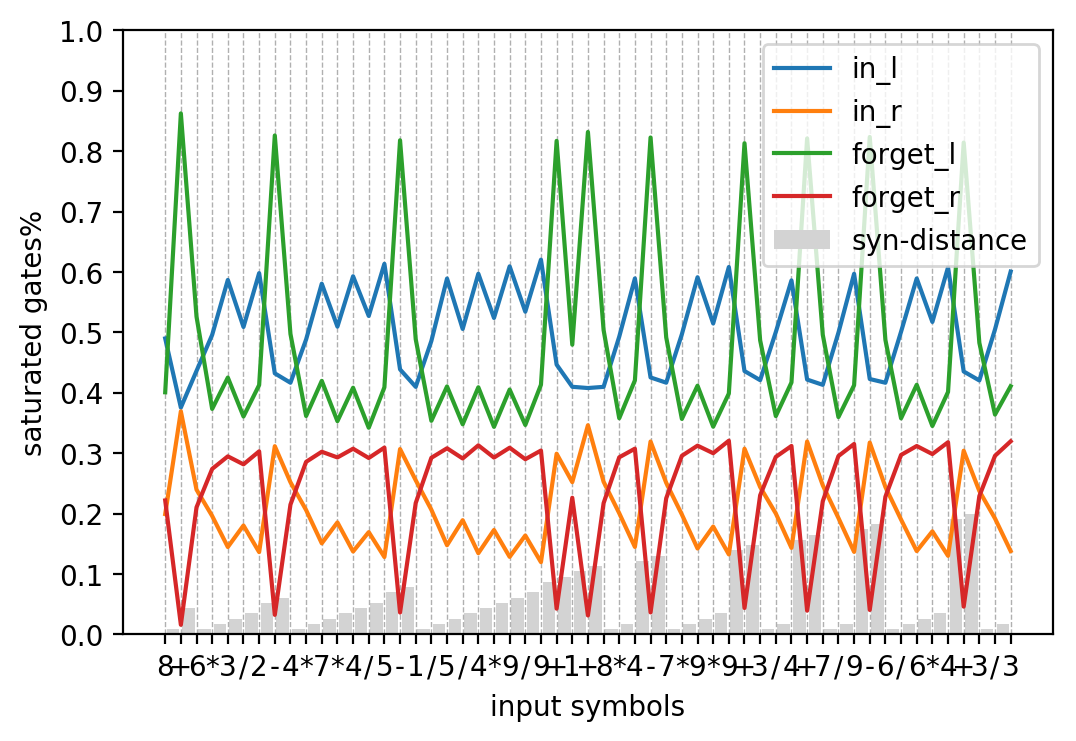

In [59]:
fig, ax = plt.subplots()
fig.dpi = 200
plt.grid(axis='x', linestyle='dashed', linewidth=0.5)
plt.plot(np.arange(seq_len), 
         np.array([in_l[i] for i in in_l.keys()])/ngates,
        label='in_l')
plt.plot(np.arange(seq_len), 
         np.array([in_r[i] for i in in_r.keys()])/ngates,
        label='in_r')
plt.plot(np.arange(seq_len), 
         np.array([forget_l[i] for i in forget_l.keys()])/ngates,
        label='forget_l')
plt.plot(np.arange(seq_len), 
         np.array([forget_r[i] for i in forget_r.keys()])/ngates,
        label='forget_r')

plt.bar(np.arange(0.5, seq_len-0.5), np.array(syn_dis)/max(syn_dis) * 0.2,
        label='syn-distance', color='lightgray')

plt.ylabel('saturated gates%')
plt.xlabel('input symbols')

plt.legend()
plt.xticks(np.arange(0, seq_len, 1), list(seq))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.show()

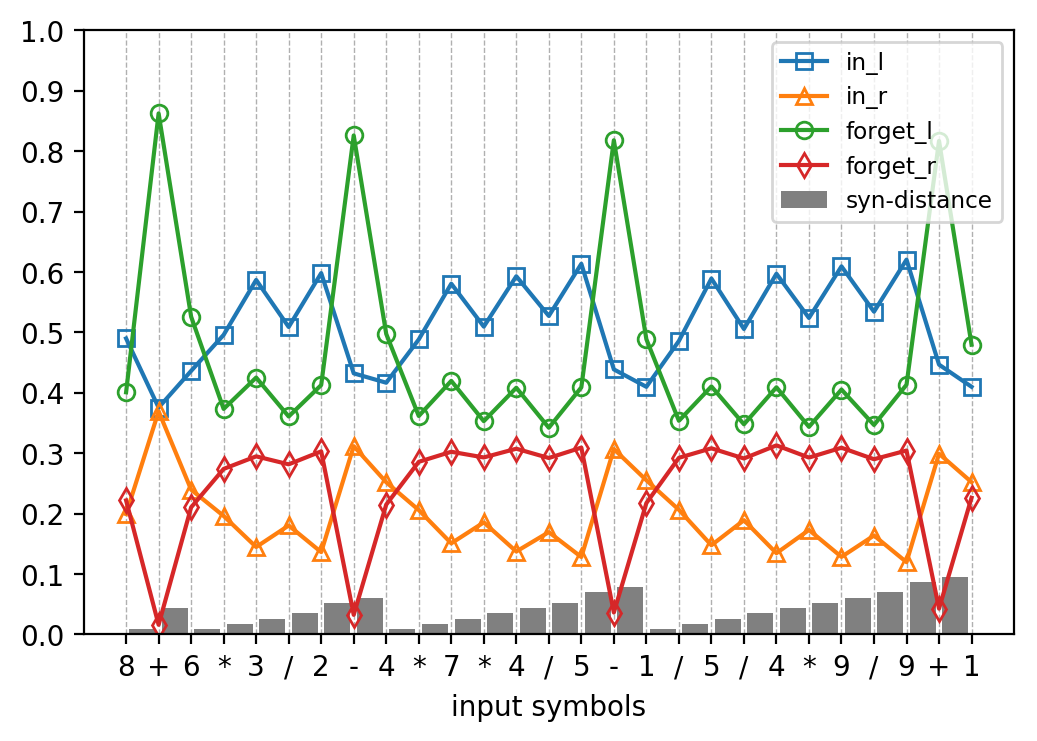

In [63]:
fig, ax = plt.subplots()
kept=seq_len//2
fig.dpi = 200
plt.grid(axis='x', linestyle='dashed', linewidth=0.5)
plt.plot(np.arange(seq_len)[:kept], 
         (np.array([in_l[i] for i in in_l.keys()])/ngates)[:kept],
        label='in_l', marker='s', fillstyle='none')
plt.plot(np.arange(seq_len)[:kept], 
         (np.array([in_r[i] for i in in_r.keys()])/ngates)[:kept],
        label='in_r', marker='^', fillstyle='none')
plt.plot(np.arange(seq_len)[:kept], 
         (np.array([forget_l[i] for i in forget_l.keys()])/ngates)[:kept],
        label='forget_l', marker='o', fillstyle='none')
plt.plot(np.arange(seq_len)[:kept], 
         (np.array([forget_r[i] for i in forget_r.keys()])/ngates)[:kept],
        label='forget_r', marker='d', fillstyle='none')

plt.bar(np.arange(0.5, seq_len-0.5)[:kept-1], (np.array(syn_dis)/max(syn_dis) * 0.2)[:kept-1],
        label='syn-distance', color='gray')

# plt.ylabel('saturated gates%')
plt.xlabel('input symbols')

plt.legend(fontsize='small')
plt.xticks(np.arange(0, seq_len, 1)[:kept], list(seq)[:kept])
plt.yticks(np.arange(0, 1.1, 0.1))
plt.show()

In [ ]:
fig, ax = plt.subplots()
fig.dpi = 200
plt.grid(axis='x', linestyle='dashed', linewidth=0.5)
plt.plot(np.arange(seq_len), 
         np.array([in_l[i] for i in in_l.keys()])/ngates,
        label='in_l')
plt.plot(np.arange(seq_len), 
         np.array([in_r[i] for i in in_r.keys()])/ngates,
        label='in_r')
plt.plot(np.arange(seq_len), 
         np.array([forget_l[i] for i in forget_l.keys()])/ngates,
        label='forget_l')
plt.plot(np.arange(seq_len), 
         np.array([forget_r[i] for i in forget_r.keys()])/ngates,
        label='forget_r')

plt.bar(np.arange(0.5, seq_len-0.5), np.array(syn_dis)/max(syn_dis) * 0.2,
        label='syn-distance', color='lightgray')

plt.ylabel('saturated gates%')
plt.xlabel('input symbols')

plt.legend()
plt.xticks(np.arange(0, seq_len, 1), list(seq))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.show()

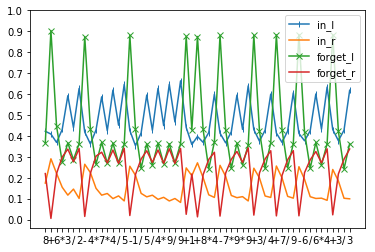

In [31]:
plt.plot(np.arange(seq_len), 
         np.array([in_l[i] for i in in_l.keys()])/ngates,
        label='in_l', marker='|')
plt.plot(np.arange(seq_len), 
         np.array([in_r[i] for i in in_r.keys()])/ngates,
        label='in_r')
plt.plot(np.arange(seq_len), 
         np.array([forget_l[i] for i in forget_l.keys()])/ngates,
        label='forget_l',marker='x')
plt.plot(np.arange(seq_len), 
         np.array([forget_r[i] for i in forget_r.keys()])/ngates,
        label='forget_r')

plt.legend()
plt.xticks(np.arange(0, seq_len, 1), list(seq))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.show()

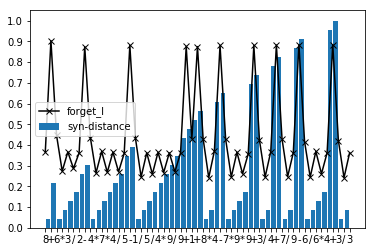

In [32]:
plt.plot(np.arange(seq_len), 
         np.array([forget_l[i] for i in forget_l.keys()])/ngates,
        label='forget_l',marker='x', color='black')
plt.bar(np.arange(0.5, seq_len-0.5), np.array(syn_dis)/max(syn_dis), label='syn-distance')

plt.legend()
plt.xticks(np.arange(0, seq_len, 1), list(seq))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.show()

# 0.98 alstmN20

In [5]:
import json
seq = '8 + 6 * 3 / 2 - 4 * 7 * 4 / 5 - 1 / 5 / 4 * 9 / 9 + 1 + 8 * 4 - 7 * 9 * 9 + 3 / 4 + 7 / 9 - 6 / 6 * 4 + 3 / 3'.split(' ')
seq_len = len(seq)
ds = '1 5 1 2 3 4 6 7 1 2 3 4 5 6 8 9 1 2 3 4 5 6 7 8 10 11 12 13 1 2 14 15 1 2 3 4 16 17 1 2 18 19 1 2 20 21 1 2 3 4 22 23 1 2'.split(' ')
syn_dis = [int(d) for d in ds]

In [6]:
a = {i:[] for i in range(seq_len)}
window_size = 20
i = 0
nc = 0
nt = 0
with open('feval-analy_d23_ne10-alstm.txt', 'r') as f:
    for line in f:
        line_json = json.loads(line)
        if 'a' not in line_json:
            nc += line_json['is_correct']
            nt += 1
            i = 0
            continue
        
        vec = [0] * seq_len
        atten = line_json['a']
        vec[i-len(atten):i] = atten
#         if len(atten) > 0:
#         vec[i+1-len(atten):i+1] = atten
        a[i].append(vec)
        i += 1



In [7]:
nc/nt

0.718

In [8]:
a_temp = {i:[] for i in range(seq_len)}
for i in range(seq_len):
    a_temp[i] = np.array(a[i]).sum(0)/len(a[i])
attens = np.array([a_temp[i] for i in range(seq_len)])

NameError: name 'np' is not defined

NameError: name 'attens' is not defined

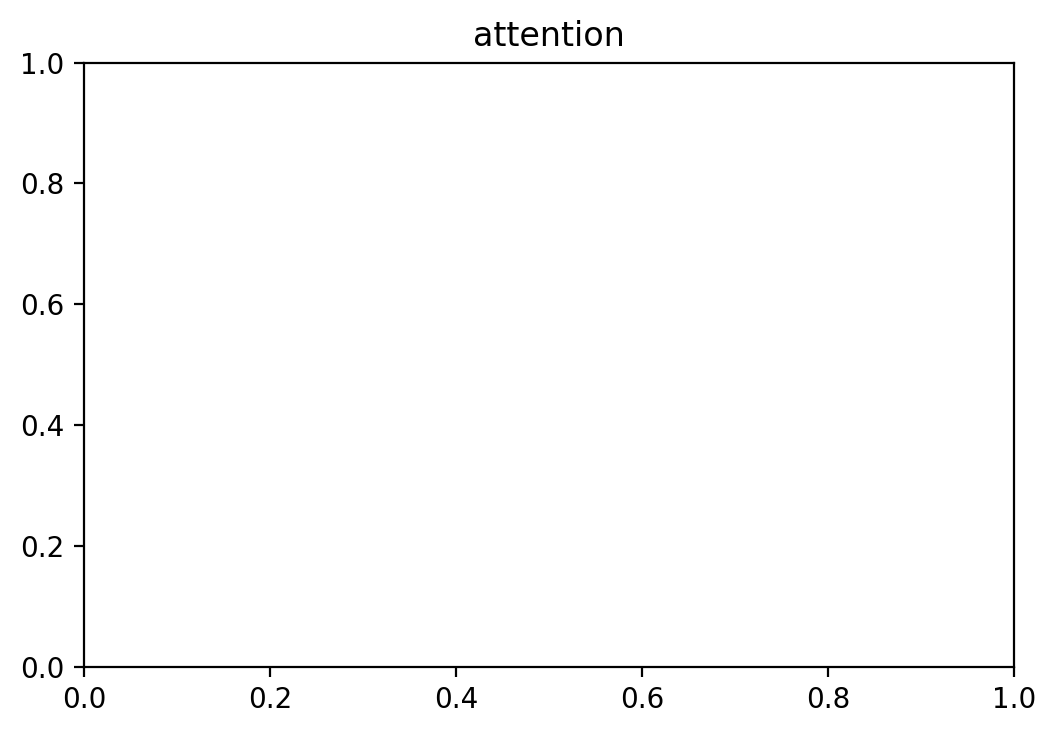

In [11]:
fig, ax = plt.subplots()
fig.dpi = 200
plt.title('attention')
plt.imshow(attens)
plt.xticks(np.arange(seq_len), list(seq))
plt.ylabel('time step')
plt.yticks(np.arange(seq_len), list(seq))
# plt.yticks(np.arange(0, seq_len, 3))
plt.xlabel('input')